<a href="https://colab.research.google.com/github/incable1560/MLF_228046_Ondrej_Hrozek/blob/main/MLF_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
# Exercise 1.1

n = 5

for i in range(1, 2*n):
    print("X " * (n - abs(n - i)))

X 
X X 
X X X 
X X X X 
X X X X X 
X X X X 
X X X 
X X 
X 


In [100]:
# Exercise 1.2

input_str = "n45as29@#8ss6"

total = sum(int(ch) for ch in input_str if ch.isdigit())

print("Sum of digits:", total)

Sum of digits: 34


In [101]:
# Exercise 1.3

n = 55

if n == 0:
    print("0")
else:

    is_negative = n < 0
    n = abs(n)
    binary_digits = ""
    while n > 0:
        remainder = n % 2
        binary_digits = str(remainder) + binary_digits
        n = n // 2

    if is_negative:
        binary_digits = "-" + binary_digits


    print("Binary:", binary_digits)

Binary: 110111


In [102]:
# Exercise 1.4

def fibonacci(upper_threshold: int) -> list:
    if upper_threshold <= 0:
        return []

    fib_numbers = [0]

    if upper_threshold > 1:
        fib_numbers.append(1)

    while True:
        next_value = fib_numbers[-1] + fib_numbers[-2]

        if next_value >= upper_threshold:
            break

        fib_numbers.append(next_value)

    return fib_numbers

print(fibonacci(100))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]


In [103]:
# Exercise 1.5

import random

def rock_paper_scissors() -> None:
    choices = ["rock", "paper", "scissors"]

    computer_choice = random.choice(choices)
    user_choice = input("Enter rock, paper, or scissors: ").strip().lower()

    if user_choice not in choices:
        print("Invalid input")
        return

    print("Computer chose:", computer_choice)

    if user_choice == computer_choice:
        print("It is a tie")
    elif (
        (user_choice == "rock" and computer_choice == "scissors") or
        (user_choice == "paper" and computer_choice == "rock") or
        (user_choice == "scissors" and computer_choice == "paper")
    ):
        print("You win")
    else:
        print("You lose")


rock_paper_scissors()

Enter rock, paper, or scissors: ROCK
Computer chose: paper
You lose


In [104]:
# Exercise 2.1

import numpy as np
import time


def create_array_nxn(n: int) -> np.ndarray:
    if n <= 0:
        raise ValueError("n must be a positive integer")

    return np.arange(n*n - 1, -1, -1).reshape(n, n)


def apply_threshold_loop(arr: np.ndarray, threshold: int) -> np.ndarray:
    result = arr.copy()

    rows, cols = result.shape
    for i in range(rows):
        for j in range(cols):
            if result[i, j] < threshold:
                result[i, j] = 0

    return result


def apply_threshold_vectorized(arr: np.ndarray, threshold: int) -> np.ndarray:
    result = arr.copy()
    result[result < threshold] = 0
    return result


def compare_performance(n: int, threshold: int) -> None:
    arr = create_array_nxn(n)

    # Loop-based timing
    start_loop = time.time()
    apply_threshold_loop(arr, threshold)
    end_loop = time.time()

    # Vectorized timing
    start_vec = time.time()
    apply_threshold_vectorized(arr, threshold)
    end_vec = time.time()

    print(arr)
    print(f"Array size: {n}x{n}")
    print(f"Threshold: {threshold}")
    print(f"Loop execution time: {end_loop - start_loop:.6f} seconds")
    print(f"Vectorized execution time: {end_vec - start_vec:.6f} seconds")

compare_performance(1000, 100000)

[[999999 999998 999997 ... 999002 999001 999000]
 [998999 998998 998997 ... 998002 998001 998000]
 [997999 997998 997997 ... 997002 997001 997000]
 ...
 [  2999   2998   2997 ...   2002   2001   2000]
 [  1999   1998   1997 ...   1002   1001   1000]
 [   999    998    997 ...      2      1      0]]
Array size: 1000x1000
Threshold: 100000
Loop execution time: 0.248824 seconds
Vectorized execution time: 0.003144 seconds


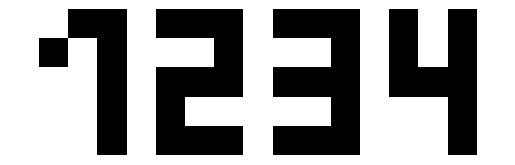

In [105]:
# Exercise 2.2

import numpy as np
import matplotlib.pyplot as plt

nums = {
    "1": np.array([[0, 1, 1],
                   [1, 0, 1],
                   [0, 0, 1],
                   [0, 0, 1],
                   [0, 0, 1]]),

    "2": np.array([[1, 1, 1],
                   [0, 0, 1],
                   [1, 1, 1],
                   [1, 0, 0],
                   [1, 1, 1]]),

    "3": np.array([[1, 1, 1],
                   [0, 0, 1],
                   [1, 1, 1],
                   [0, 0, 1],
                   [1, 1, 1]]),

    "4": np.array([[1, 0, 1],
                   [1, 0, 1],
                   [1, 1, 1],
                   [0, 0, 1],
                   [0, 0, 1]]),

    "5": np.array([[1, 1, 1],
                   [1, 0, 0],
                   [1, 1, 1],
                   [0, 0, 1],
                   [1, 1, 1]]),

    "6": np.array([[1, 1, 1],
                   [1, 0, 0],
                   [1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]]),

    "7": np.array([[1, 1, 1],
                   [0, 0, 1],
                   [0, 0, 1],
                   [0, 0, 1],
                   [0, 0, 1]]),

    "8": np.array([[1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]]),

    "9": np.array([[1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1],
                   [0, 0, 1],
                   [1, 1, 1]]),

    "0": np.array([[1, 1, 1],
                   [1, 0, 1],
                   [1, 0, 1],
                   [1, 0, 1],
                   [1, 1, 1]])
}


def show_in_digi(input_integer: int) -> None:
    digits = str(input_integer)

    arrays = []
    for d in digits:
        if d not in nums:
            raise ValueError("Input must contain only digits 0–9")
        arrays.append(nums[d])

    strip = np.zeros((5, 1))

    final_image = strip

    for arr in arrays:
        final_image = np.concatenate((final_image, arr, strip), axis=1)

    plt.imshow(final_image, cmap="gray_r")
    plt.axis("off")
    plt.show()
show_in_digi(1234)

In [106]:
# Check what dataset.describe() does
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

dataset = pd.read_csv('sample_data/california_housing_test.csv')
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [107]:
# Display all rows where total_bedrooms column is bigger than 310
total_bedrooms_310 = dataset[dataset['total_bedrooms'] > 310]
print("total_bedrooms > 310:")
print(total_bedrooms_310)

total_bedrooms > 310:
      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.05     37.37                27.0       3885.0           661.0   
2       -117.81     33.78                27.0       3589.0           507.0   
7       -120.65     35.48                19.0       2310.0           471.0   
8       -122.84     38.40                15.0       3080.0           617.0   
9       -118.02     34.08                31.0       2402.0           632.0   
...         ...       ...                 ...          ...             ...   
2990    -118.23     34.09                49.0       1638.0           456.0   
2991    -117.17     34.28                13.0       4867.0           718.0   
2993    -117.91     33.60                37.0       2088.0           510.0   
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14     34.06                27.0       5257.0          1082.0   

      population  households  median_inco

In [108]:
# Drop also first and last row
dataset_dropped = dataset.iloc[1:-1]
dataset_dropped.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
5,-119.56,36.51,37.0,1018.0,213.0,663.0,204.0,1.6635,67000.0



Mean of households: 489.912


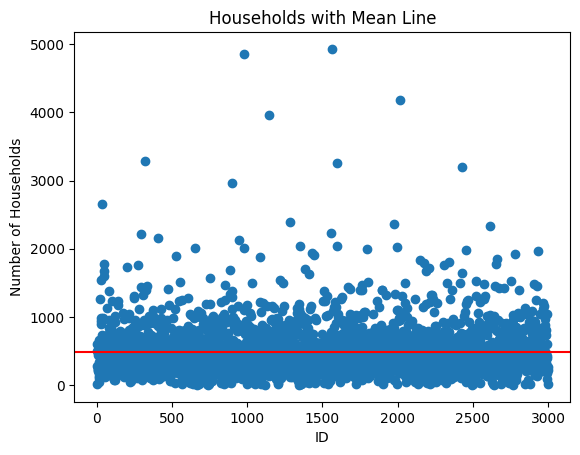

In [109]:
# Save a mean of values in households columns to variable
households_mean = dataset['households'].mean()
print(f"\nMean of households: {households_mean}")

plt.figure()
plt.scatter(dataset.index, dataset['households'])
plt.axhline(households_mean, color='red')
plt.xlabel("ID")
plt.ylabel("Number of Households")
plt.title("Households with Mean Line")
plt.show()

In [110]:
# Check if any of the columns contain NaN values, if yes, replace the NaN values with the arithmetic mean of the whole dataset
if dataset.isna().any().any():
    dataset.fillna(dataset.mean(), inplace=True)
    print("\nNaN values replaced with column means.")

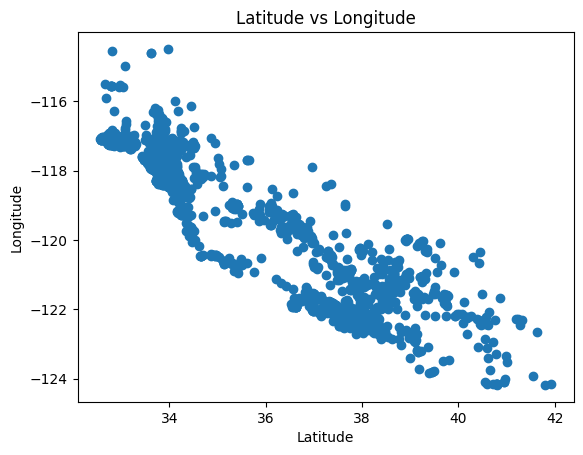

In [111]:
# Display lat and long into plot, lat would be on x axis and long on y axis
plt.figure()
plt.scatter(dataset["latitude"], dataset["longitude"])
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Latitude vs Longitude")
plt.show()

In [112]:
# Choose two arbitrary columns and normalize all values inside using min-max normalization:
scaler = MinMaxScaler()
dataset[['housing_median_age', 'median_income']] = scaler.fit_transform(
    dataset[['housing_median_age', 'median_income']]
)
print("\nNormalized columns 'housing_median_age' and 'median_income':")
print(dataset[['housing_median_age', 'median_income']].head())


Normalized columns 'housing_median_age' and 'median_income':
   housing_median_age  median_income
0            0.509804       0.421277
1            0.823529       0.213728
2            0.509804       0.365064
3            0.529412       0.388684
4            0.352941       0.168108


In [113]:
# Create a Correlation Matrix from all columns
correlation_matrix = dataset.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)


Correlation matrix:
                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.925017           -0.064203     0.049865   
latitude            -0.925017  1.000000           -0.025143    -0.039632   
housing_median_age  -0.064203 -0.025143            1.000000    -0.367850   
total_rooms          0.049865 -0.039632           -0.367850     1.000000   
total_bedrooms       0.070869 -0.068245           -0.323154     0.937749   
population           0.111572 -0.117318           -0.299888     0.838867   
households           0.051062 -0.068296           -0.305171     0.914116   
median_income       -0.018701 -0.072363           -0.144315     0.221249   
median_house_value  -0.050662 -0.138428            0.091409     0.160427   

                    total_bedrooms  population  households  median_income  \
longitude                 0.070869    0.111572    0.051062      -0.018701   
latitude                 -0.068245   -0.117318   -0.068296      